In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [102]:
data1 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00000.csv')
data2 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00001.csv')
data3 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00002.csv')
data4 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00003.csv')
data5 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00004.csv')
data6 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00005.csv')
data7 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00006.csv')
data8 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00007.csv')
data9 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00008.csv')
data10= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00009.csv')
data11= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00010.csv')
data12= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00011.csv')
data13= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00012.csv')
data14= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00014.csv')
data15= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00014.csv')
data16= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00015.csv')
data17= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00016.csv')
data18= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00017.csv')
data19= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00018.csv')
data20= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00019.csv')
data21= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00020.csv')
data22= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00021.csv')
data23= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00022.csv')
data24= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00023.csv')
data25= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00024.csv')
data26= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00025.csv')

In [ ]:
data1['ARP']

In [19]:
# features1 = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
#              'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
#              'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number',
#              'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 
#              'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 
#              'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 
#              'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']


Ortak Özellikler:


In [103]:
len(data1.columns)

47

In [104]:
print("data1:",data1.shape)
print("data2:",data2.shape)
print("data3:",data3.shape)
print("data4:",data4.shape)

data1: (238687, 47)
data2: (218805, 47)
data3: (275258, 47)
data4: (231023, 47)


In [150]:
dataframes = [data1, data2, data3, data4]
dataset1 = pd.concat(dataframes, ignore_index=True)
dataset = dataset1.copy()

# veri eleman ekleme

In [151]:
dataset['label']
dataset.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [152]:
dataset['label'].value_counts(dropna=False)

label
DDoS-ICMP_Flood            148212
DDoS-UDP_Flood             111514
DDoS-TCP_Flood              93138
DDoS-PSHACK_Flood           84881
DDoS-SYN_Flood              84236
DDoS-RSTFINFlood            83513
DDoS-SynonymousIP_Flood     74167
DoS-UDP_Flood               68579
DoS-TCP_Flood               54990
DoS-SYN_Flood               41558
BenignTraffic               22484
Mirai-greeth_flood          20319
Mirai-udpplain              18584
Mirai-greip_flood           15599
DDoS-ICMP_Fragmentation      9412
MITM-ArpSpoofing             6415
DDoS-ACK_Fragmentation       5917
DDoS-UDP_Fragmentation       5890
DNS_Spoofing                 3694
Recon-HostDiscovery          2770
Recon-OSScan                 2050
Recon-PortScan               1706
DoS-HTTP_Flood               1552
VulnerabilityScan             745
DDoS-HTTP_Flood               568
DDoS-SlowLoris                445
DictionaryBruteForce          300
BrowserHijacking              131
SqlInjection                  113
CommandI

In [153]:
etiket_sayilari = dataset['label'].value_counts()
etiket_sayilari_kucuk_50k = etiket_sayilari[etiket_sayilari < 50000].index.tolist()
print("Eleman sayısı 50 binden küçük olan etiketler:", etiket_sayilari_kucuk_50k)

Eleman sayısı 50 binden küçük olan etiketler: ['DoS-SYN_Flood', 'BenignTraffic', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood', 'DDoS-ICMP_Fragmentation', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation', 'DDoS-UDP_Fragmentation', 'DNS_Spoofing', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'DoS-HTTP_Flood', 'VulnerabilityScan', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris', 'DictionaryBruteForce', 'BrowserHijacking', 'SqlInjection', 'CommandInjection', 'Backdoor_Malware', 'XSS', 'Recon-PingSweep', 'Uploading_Attack']


In [154]:
satirlar_eklenecek = data2[data2['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data5[data5['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data6[data6['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data7[data7['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data8[data8['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data9[data9['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data10[data10['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data11[data11['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data12[data12['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data13[data13['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data14[data14['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data15[data15['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data16[data16['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data17[data17['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data18[data18['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data19[data19['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data20[data20['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data21[data21['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data22[data22['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data23[data23['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data24[data24['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data25[data25['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data26[data26['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)


In [155]:
dataset['label'].value_counts(dropna=False)

label
DoS-SYN_Flood              284016
BenignTraffic              154483
DDoS-ICMP_Flood            148212
Mirai-greeth_flood         138914
Mirai-udpplain             125377
DDoS-UDP_Flood             111514
Mirai-greip_flood          106338
DDoS-TCP_Flood              93138
DDoS-PSHACK_Flood           84881
DDoS-SYN_Flood              84236
DDoS-RSTFINFlood            83513
DDoS-SynonymousIP_Flood     74167
DoS-UDP_Flood               68579
DDoS-ICMP_Fragmentation     63614
DoS-TCP_Flood               54990
MITM-ArpSpoofing            43481
DDoS-UDP_Fragmentation      40794
DDoS-ACK_Fragmentation      40246
DNS_Spoofing                25268
Recon-HostDiscovery         18851
Recon-OSScan                13803
Recon-PortScan              11604
DoS-HTTP_Flood              10091
VulnerabilityScan            5249
DDoS-HTTP_Flood              4037
DDoS-SlowLoris               3348
DictionaryBruteForce         1784
BrowserHijacking              781
SqlInjection                  746
CommandI

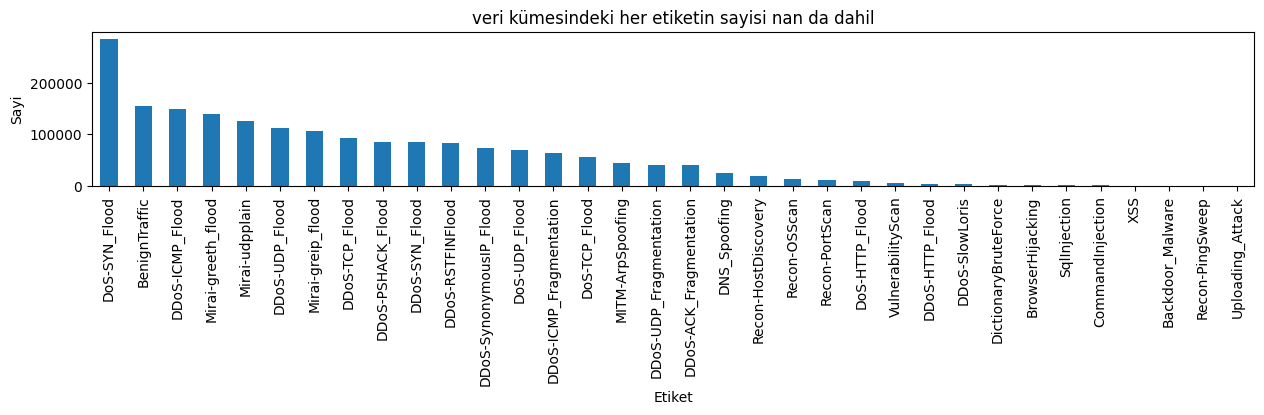

In [156]:

etiket_veri_sayisi = dataset['label'].value_counts(dropna=False)

plt.figure(figsize=(15, 2))  
etiket_veri_sayisi.plot(kind='bar')

plt.xlabel('Etiket')
plt.ylabel('Sayi')
plt.title('veri kümesindeki her etiketin sayisi nan da dahil')
plt.show()

In [157]:
print(etiket_veri_sayisi)

label
DoS-SYN_Flood              284016
BenignTraffic              154483
DDoS-ICMP_Flood            148212
Mirai-greeth_flood         138914
Mirai-udpplain             125377
DDoS-UDP_Flood             111514
Mirai-greip_flood          106338
DDoS-TCP_Flood              93138
DDoS-PSHACK_Flood           84881
DDoS-SYN_Flood              84236
DDoS-RSTFINFlood            83513
DDoS-SynonymousIP_Flood     74167
DoS-UDP_Flood               68579
DDoS-ICMP_Fragmentation     63614
DoS-TCP_Flood               54990
MITM-ArpSpoofing            43481
DDoS-UDP_Fragmentation      40794
DDoS-ACK_Fragmentation      40246
DNS_Spoofing                25268
Recon-HostDiscovery         18851
Recon-OSScan                13803
Recon-PortScan              11604
DoS-HTTP_Flood              10091
VulnerabilityScan            5249
DDoS-HTTP_Flood              4037
DDoS-SlowLoris               3348
DictionaryBruteForce         1784
BrowserHijacking              781
SqlInjection                  746
CommandI

In [120]:
labels_to_balance =  ["DoS-SYN_Flood",
    "BenignTraffic",
    "DDoS-ICMP_Flood" ,
    "Mirai-greeth_flood",
    "Mirai-udpplain",
    "DDoS-UDP_Flood",
    "Mirai-greip_flood"]

balanced_dataset = pd.concat([dataset[dataset['label'] == label].sample(80000, replace=True) if label in labels_to_balance else dataset[dataset['label'] == label] for label in dataset['label'].unique()])

balanced_dataset.reset_index(drop=True, inplace=True)
print(balanced_dataset['label'].value_counts())             
          
dataset=balanced_dataset.copy()

label
DDoS-TCP_Flood             93138
DDoS-PSHACK_Flood          84881
DDoS-SYN_Flood             84236
DDoS-RSTFINFlood           83513
DoS-SYN_Flood              80000
Mirai-greeth_flood         80000
Mirai-udpplain             80000
DNS_Spoofing               80000
DDoS-ICMP_Flood            80000
DDoS-UDP_Flood             80000
BenignTraffic              80000
MITM-ArpSpoofing           80000
DDoS-ACK_Fragmentation     80000
Mirai-greip_flood          80000
Recon-HostDiscovery        80000
Recon-OSScan               80000
DDoS-UDP_Fragmentation     80000
DDoS-SynonymousIP_Flood    74167
DoS-UDP_Flood              68579
DDoS-ICMP_Fragmentation    63614
DoS-TCP_Flood              54990
Recon-PortScan             21502
DoS-HTTP_Flood             18630
VulnerabilityScan           9753
DDoS-HTTP_Flood             7506
DDoS-SlowLoris              6251
DictionaryBruteForce        3268
BrowserHijacking            1431
SqlInjection                1379
CommandInjection            1358
XSS 

In [121]:
dataset['label'].unique()

dataset.shape

(1720983, 47)

In [123]:
etiket_sayilari_kucuk_14k = etiket_sayilari[etiket_sayilari < 14000].index.tolist()

In [124]:
import pandas as pd


label_column = 'label'
new_data = []

for label in etiket_sayilari_kucuk_14k:
    subset = balanced_dataset[balanced_dataset[label_column] == label]
    
    new_data.append(subset)
    new_data.append(subset)
    new_data.append(subset)


new_data.append(balanced_dataset)
balanced_dataset_expanded = pd.concat(new_data, ignore_index=True)

print(balanced_dataset_expanded.shape)




(2182578, 47)


In [137]:
balanced_dataset_expanded['label'].value_counts()

dataset = balanced_dataset_expanded.copy()

In [138]:
etiket_sayilari = dataset['label'].value_counts(dropna=False)

etiket_sayilari_kucuk_20k = etiket_sayilari[etiket_sayilari < 20000]
print("20,000'den az örneğe sahip etiketler ve örnek sayıları:")
print(etiket_sayilari_kucuk_20k)
etiket_sayilari_kucuk_20k_indexler = etiket_sayilari_kucuk_20k.index.tolist()
print("20,000'den az örneğe sahip etiketlerin indeksleri:")
print(etiket_sayilari_kucuk_20k_indexler)


20,000'den az örneğe sahip etiketler ve örnek sayıları:
label
DictionaryBruteForce    13072
BrowserHijacking         5724
SqlInjection             5516
CommandInjection         5432
XSS                      3900
Backdoor_Malware         3712
Recon-PingSweep          2196
Uploading_Attack         1340
Name: count, dtype: int64
20,000'den az örneğe sahip etiketlerin indeksleri:
['DictionaryBruteForce', 'BrowserHijacking', 'SqlInjection', 'CommandInjection', 'XSS', 'Backdoor_Malware', 'Recon-PingSweep', 'Uploading_Attack']


In [139]:
smote = SMOTE(sampling_strategy={
 'DictionaryBruteForce':20000,
 'BrowserHijacking':20000,
 'SqlInjection':20000,
 'CommandInjection':20000,
 'XSS':20000,
 'Backdoor_Malware':20000,
 'Recon-PingSweep':20000,
 'Uploading_Attack':20000
})

       
X_resampled, y_resampled = smote.fit_resample(dataset.drop(columns=['label']), dataset['label'])

resampled_dataset = pd.DataFrame(X_resampled, columns=dataset.drop(columns=['label']).columns)
resampled_dataset['label'] = y_resampled


print(resampled_dataset['label'].value_counts())

label
Recon-OSScan               320000
DDoS-TCP_Flood              93138
Recon-PortScan              86008
DDoS-PSHACK_Flood           84881
DDoS-SYN_Flood              84236
DDoS-RSTFINFlood            83513
DDoS-UDP_Fragmentation      80000
DNS_Spoofing                80000
Mirai-greip_flood           80000
DDoS-ACK_Fragmentation      80000
MITM-ArpSpoofing            80000
BenignTraffic               80000
DDoS-UDP_Flood              80000
Mirai-udpplain              80000
Mirai-greeth_flood          80000
DoS-SYN_Flood               80000
Recon-HostDiscovery         80000
DDoS-ICMP_Flood             80000
DoS-HTTP_Flood              74520
DDoS-SynonymousIP_Flood     74167
DoS-UDP_Flood               68579
DDoS-ICMP_Fragmentation     63614
DoS-TCP_Flood               54990
VulnerabilityScan           39012
DDoS-HTTP_Flood             30024
DDoS-SlowLoris              25004
Recon-PingSweep             20000
Backdoor_Malware            20000
XSS                         20000
CommandI

In [140]:
bos_sutunlar = [sutun for sutun in dataset.columns if dataset[sutun].isnull().all()]
print("Tüm elemanları boş olan sütunlar:", bos_sutunlar)

Tüm elemanları boş olan sütunlar: []


In [141]:
print("Sütunların veri tipleri:")
print(dataset.dtypes)

veri_tipi_sayilari = dataset.dtypes.value_counts()

print("\nVeri tiplerine göre sütun sayıları:")
print(veri_tipi_sayilari)

Sütunların veri tipleri:
flow_duration      float64
Header_Length      float64
Protocol Type      float64
Duration           float64
Rate               float64
Srate              float64
Drate              float64
fin_flag_number    float64
syn_flag_number    float64
rst_flag_number    float64
psh_flag_number    float64
ack_flag_number    float64
ece_flag_number    float64
cwr_flag_number    float64
ack_count          float64
syn_count          float64
fin_count          float64
urg_count          float64
rst_count          float64
HTTP               float64
HTTPS              float64
DNS                float64
Telnet             float64
SMTP               float64
SSH                float64
IRC                float64
TCP                float64
UDP                float64
DHCP               float64
ARP                float64
ICMP               float64
IPv                float64
LLC                float64
Tot sum            float64
Min                float64
Max                float64
AVG

In [67]:
def kategorik_sutunlari_bul(dataframe, eşik_değer=10):

    kategorik_sutunlar = []
    for sutun in dataframe.columns:
        if dataframe[sutun].nunique() <= eşik_değer:
            print(sutun + " sütunundaki benzersiz eleman sayısı:", dataframe[sutun].nunique())
            kategorik_sutunlar.append(sutun)
    kategorik_sutunlar.append('label')
    return kategorik_sutunlar

kategorik_sutunlar = kategorik_sutunlari_bul(dataset)



fin_flag_number sütunundaki benzersiz eleman sayısı: 2
syn_flag_number sütunundaki benzersiz eleman sayısı: 2
rst_flag_number sütunundaki benzersiz eleman sayısı: 2
psh_flag_number sütunundaki benzersiz eleman sayısı: 2
ack_flag_number sütunundaki benzersiz eleman sayısı: 2
ece_flag_number sütunundaki benzersiz eleman sayısı: 2
cwr_flag_number sütunundaki benzersiz eleman sayısı: 2
HTTP sütunundaki benzersiz eleman sayısı: 2
HTTPS sütunundaki benzersiz eleman sayısı: 2
DNS sütunundaki benzersiz eleman sayısı: 2
Telnet sütunundaki benzersiz eleman sayısı: 1
SMTP sütunundaki benzersiz eleman sayısı: 1
SSH sütunundaki benzersiz eleman sayısı: 2
IRC sütunundaki benzersiz eleman sayısı: 1
TCP sütunundaki benzersiz eleman sayısı: 2
UDP sütunundaki benzersiz eleman sayısı: 2
DHCP sütunundaki benzersiz eleman sayısı: 2
ARP sütunundaki benzersiz eleman sayısı: 2
ICMP sütunundaki benzersiz eleman sayısı: 2
IPv sütunundaki benzersiz eleman sayısı: 2
LLC sütunundaki benzersiz eleman sayısı: 2


In [143]:
dataset[kategorik_sutunlar] = dataset[kategorik_sutunlar].astype('category')

In [144]:
bos_elemanlar = dataset.isnull().sum().sum()
bos_elemanlar

0

In [147]:
dataset['label']
dataset.shape

(2182578, 47)

In [148]:
from sklearn.preprocessing import LabelEncoder

X = dataset.drop("label", axis=1)
y = dataset['label']

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


## MODEL

In [74]:
model = xgb.XGBClassifier(enable_categorical=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Model Accuracy:", accuracy)
print("Model F1 Score:", f1)

Model Accuracy: 0.9681064499894105
Model F1 Score: 0.9679253201358089


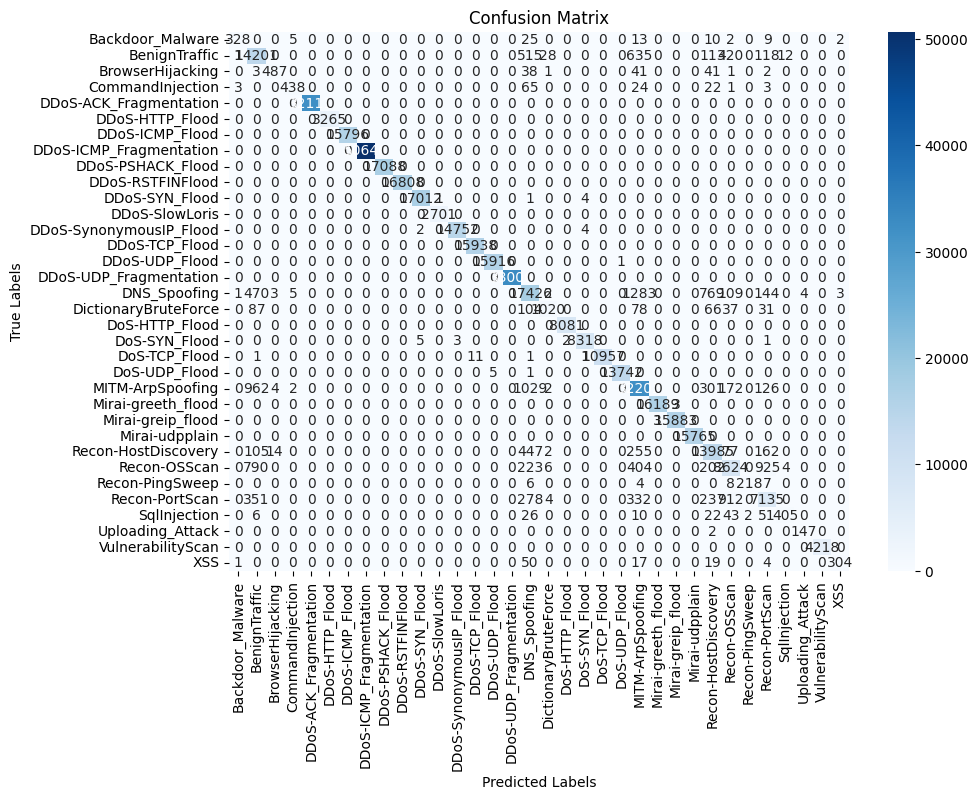

In [75]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

* veri seti düzenleme
* (rfe) özellik seçimi
* cross validation
* grid search , random search
* farklı model eğitme
* stack classifier